Autores:
- Adrián Fernández Galán 100472182
- Paula Subias Serrano 100472119

Repositorio:
- https://github.com/PaulaUc3m/Grupo4_P2AA

In [153]:
import csv
import numpy as np
import pandas as pd
import random
import seaborn as sns
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


SEED = 472182
random.seed(SEED)
np.random.seed(SEED)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

Lo primero que se debe hacer para trabajar con los datos es cargarlos, analizar las columnas que se nos proporcionan y comprobar que los valores tienen sentido.

In [154]:
data = pd.read_csv("stars_data.csv")
print("El tamaño del data set es:" ,data.shape)
data.describe(include='all')

El tamaño del data set es: (240, 6)


,Temperature,L,R,A_M,Color,Spectral_Class
count,240.000000,240.000000,240.000000,240.000000,240,240
unique,NaN,NaN,NaN,NaN,17,7
top,NaN,NaN,NaN,NaN,Red,M
freq,NaN,NaN,NaN,NaN,112,111
mean,10497.462500,107188.361635,237.157781,4.382396,NaN,NaN
std,9552.425037,179432.244940,517.155763,10.532512,NaN,NaN
min,1939.000000,0.000080,0.008400,-11.920000,NaN,NaN
25%,3344.250000,0.000865,0.102750,-6.232500,NaN,NaN
50%,5776.000000,0.070500,0.762500,8.313000,NaN,NaN
75%,15055.500000,198050.000000,42.750000,13.697500,NaN,NaN


In [155]:
data

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.17000,16.120,Red,M
1,3042,0.000500,0.15420,16.600,Red,M
2,2600,0.000300,0.10200,18.700,Red,M
3,2800,0.000200,0.16000,16.650,Red,M
4,1939,0.000138,0.10300,20.060,Red,M
5,2840,0.000650,0.11000,16.980,Red,M
6,2637,0.000730,0.12700,17.220,Red,M
7,2600,0.000400,0.09600,17.400,Red,M
8,2650,0.000690,0.11000,17.450,Red,M
9,2700,0.000180,0.13000,16.050,Red,M


Lo primero que vemos es que la columna **color** y **spectral_class** son columnas categóricas, sin embargo en la columna **color** existen muchas categorías muy similares. Para reducir la cantidad de categorías ,y por lo tanto la carga de datos que tendrá el modelo, se traducirán los colores que se consideran similares a tan solo un color. De esta manera todos los colores muy parecidos al blanco se traducirán como _White_.  

In [156]:
pd.unique(data['Color'])

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

'Blue'>'Blue White'='Blue white'='Blue-White'='Blue-white'>'Whitish'='White'='white'>'Yellowish White'>'White-Yellow'='yellow-white'>'yellowish'='Yellowish'>'Pale yellow orange'>'Orange'>'Orange-Red'>'Red'

O > B > A > F > G > K > M

In [157]:
colors = {"Blue": ["Blue"],"Blue-White": ["Blue-White", "Blue White", "Blue white", "Blue-white"],
          "White": ["White","white","Whitish"],"Yellowish White": ["Yellowish White"],
          "Yellow-White": ["White-Yellow","yellow-white", "Yellow-White"],"Yellowish":["Yellowish","yellowish"],
          "Pale-Yellow-Orange":["Pale yellow orange", "Pale-Yellow-Orange"], "Orange": ["Orange"],
          "Orange-Red":["Orange-Red"], "Red":["Red"]}

def traduccion(dato):
    for key, values in colors.items():
        if dato in values:
            return key
        
data['Color'] = data['Color'].apply(lambda x: traduccion(x))

In [158]:
data

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.17000,16.120,Red,M
1,3042,0.000500,0.15420,16.600,Red,M
2,2600,0.000300,0.10200,18.700,Red,M
3,2800,0.000200,0.16000,16.650,Red,M
4,1939,0.000138,0.10300,20.060,Red,M
5,2840,0.000650,0.11000,16.980,Red,M
6,2637,0.000730,0.12700,17.220,Red,M
7,2600,0.000400,0.09600,17.400,Red,M
8,2650,0.000690,0.11000,17.450,Red,M
9,2700,0.000180,0.13000,16.050,Red,M


Tras esto ya se tienen los datos analizados y traducidos por lo que se podrá comenzar con la primera parte de la _Pipeline_: La codificación de las _features_ categóricas.

# Codificación

Con el objetivo de analizar cómo afecta el algoritmo de codificación en la predicción final del modelo vamos a codificar las columnas categóricas de dos maneras diferentes:
- **One Hot Encoding**: Consiste en desglosar cada columna categórica en _n_ columnas según la cantidad de categorías que tiene esa columna en específico. Cada nueva columna tendrá un 1 en caso de que esa columna sea la categoría que corresponde con la fila, el resto de columnas nuevas tendrán un valor de 0.
- **Ordinal Encoding**: Consiste en ordenar las categorías, lo que permite relacionar categorías. Cada categoría se traducirá a un valor ordinal, de manera que la categoría _Red_ se puede traducir a un valor 0 y otra categoría con un valor 1 no será un color muy distinto al rojo.

## One hot encoding

Para conseguir **One Hot Encoding** nos hemos servido de la librería _sklearn_ a través de la clase _OneHotEncoder()_.

Lo primero de todo es obtener las columnas a codificar para realizar la transformación con _OneHotEncoder.fit\_transform_. Tras hacer esto para todas las columnas **color** y **spectral_class** se crea un nuevo dataset con nuevas columnas codificadas y las columnas no modificadas.

In [159]:
data_hot = data
data_hot_color = data_hot[["Color"]]
data_hot_spectre = data_hot[["Spectral_Class"]]
hot_encoder = OneHotEncoder()
data_hot_color_encoded = hot_encoder.fit_transform(data_hot_color).toarray()
cabecera_color_encoded = hot_encoder.get_feature_names_out()
data_hot_spectre_encoded = hot_encoder.fit_transform(data_hot_spectre).toarray()
cabeceras_spectre_encoded = hot_encoder.get_feature_names_out()
data_hot = data_hot.drop(['Color', 'Spectral_Class'], axis=1)

data_hot_color_df = pd.DataFrame(data_hot_color_encoded, columns = cabecera_color_encoded)
data_hot_spectre_df = pd.DataFrame(data_hot_spectre_encoded, columns = cabeceras_spectre_encoded)

data_hot = pd.concat([data_hot, data_hot_color_df, data_hot_spectre_df], axis=1)

pd.set_option('display.max_rows', 10)
data_hot

,Temperature,L,R,A_M,Color_Blue,Color_Blue-White,Color_Orange,Color_Orange-Red,Color_Pale-Yellow-Orange,Color_Red,Color_White,Color_Yellow-White,Color_Yellowish,Color_Yellowish White,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3042,0.000500,0.1542,16.60,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2600,0.000300,0.1020,18.70,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2800,0.000200,0.1600,16.65,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1939,0.000138,0.1030,20.06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
236,30839,834042.000000,1194.0000,-10.63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
237,8829,537493.000000,1423.0000,-10.73,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
238,9235,404940.000000,1112.0000,-11.23,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Codificación Ordinal

Para conseguir **Codificación Ordinal** nos hemos servido de la librería _sklearn_ a través de la clase _OrdinalEncoder()_.

Lo primero de todo es obtener las columnas a codificar para realizar la transformación con _OrdinalEncoder.fit\_transform_. Tras hacer esto para todas las columnas **color** y **spectral_class** se crea un nuevo dataset con nuevas columnas codificadas y las columnas no modificadas.

In [160]:
pd.set_option('display.max_rows', 300)
spectre = [["O","B","A","F","G","K","M"]]

data_ordinary = data
data_ordinary_color = data_ordinary[["Color"]]
data_ordinary_spectre = data_ordinary[["Spectral_Class"]]
dict_keys = [list(colors.keys())]
ordinal_encoder_color = OrdinalEncoder(categories=dict_keys)
ordinal_encoder_spectre = OrdinalEncoder(categories=spectre)

data_ordinary_color_encoded = ordinal_encoder_color.fit_transform(data_ordinary_color)
cabecera_color_encoded = ordinal_encoder_color.get_feature_names_out()
data_ordinary_spectre_encoded = ordinal_encoder_spectre.fit_transform(data_ordinary_spectre)
cabeceras_spectre_encoded = ordinal_encoder_spectre.get_feature_names_out()
data_ordinary = data_ordinary.drop(['Color', 'Spectral_Class'], axis=1)

data_ordinary_color_df = pd.DataFrame(data_ordinary_color_encoded, columns = cabecera_color_encoded)
data_ordinary_spectre_df = pd.DataFrame(data_ordinary_spectre_encoded, columns = cabeceras_spectre_encoded)

data_ordinary = pd.concat([data_ordinary, data_ordinary_color_df, data_ordinary_spectre_df], axis=1)

data_ordinary

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.17000,16.120,9.0,6.0
1,3042,0.000500,0.15420,16.600,9.0,6.0
2,2600,0.000300,0.10200,18.700,9.0,6.0
3,2800,0.000200,0.16000,16.650,9.0,6.0
4,1939,0.000138,0.10300,20.060,9.0,6.0
5,2840,0.000650,0.11000,16.980,9.0,6.0
6,2637,0.000730,0.12700,17.220,9.0,6.0
7,2600,0.000400,0.09600,17.400,9.0,6.0
8,2650,0.000690,0.11000,17.450,9.0,6.0
9,2700,0.000180,0.13000,16.050,9.0,6.0


In [161]:
pd.set_option('display.max_rows', 10)
data

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Blue,O
237,8829,537493.000000,1423.0000,-10.73,White,A
238,9235,404940.000000,1112.0000,-11.23,White,A


# Escalado de Datos

Ahora que se tienen las columnas categóricas codificadas se deben trasnformar los datos para poder mostrar de forma gráfica los resultados de las predicciones de los modelos de _clustering_. La transformación se realizará a través de PCA, pero previamente se deben escalar.

In [162]:
# Escalame esta
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
data_ordinary_std_scaled = std_scaler.fit_transform(data_ordinary)
data_hot_std_scaled = std_scaler.fit_transform(data_hot)


rbt_scaler = RobustScaler()
data_ordinary_rbt_scaled = rbt_scaler.fit_transform(data_ordinary)
data_hot_rbt_scaled = rbt_scaler.fit_transform(data_hot)

# PCA

PCA nos permite realizar una reducción de dimensionalidad hasta 2 dimensiones, lo que permite realizar un gráfico de dispersión, donde cada eje es una de las dos columnas. El principal problema de reducción de la dimensionalidad es que se pierde la información que almacenan las dimensiones, ya que la transformación lineal que ocurre combina las columnas originales en nuevas columnas.

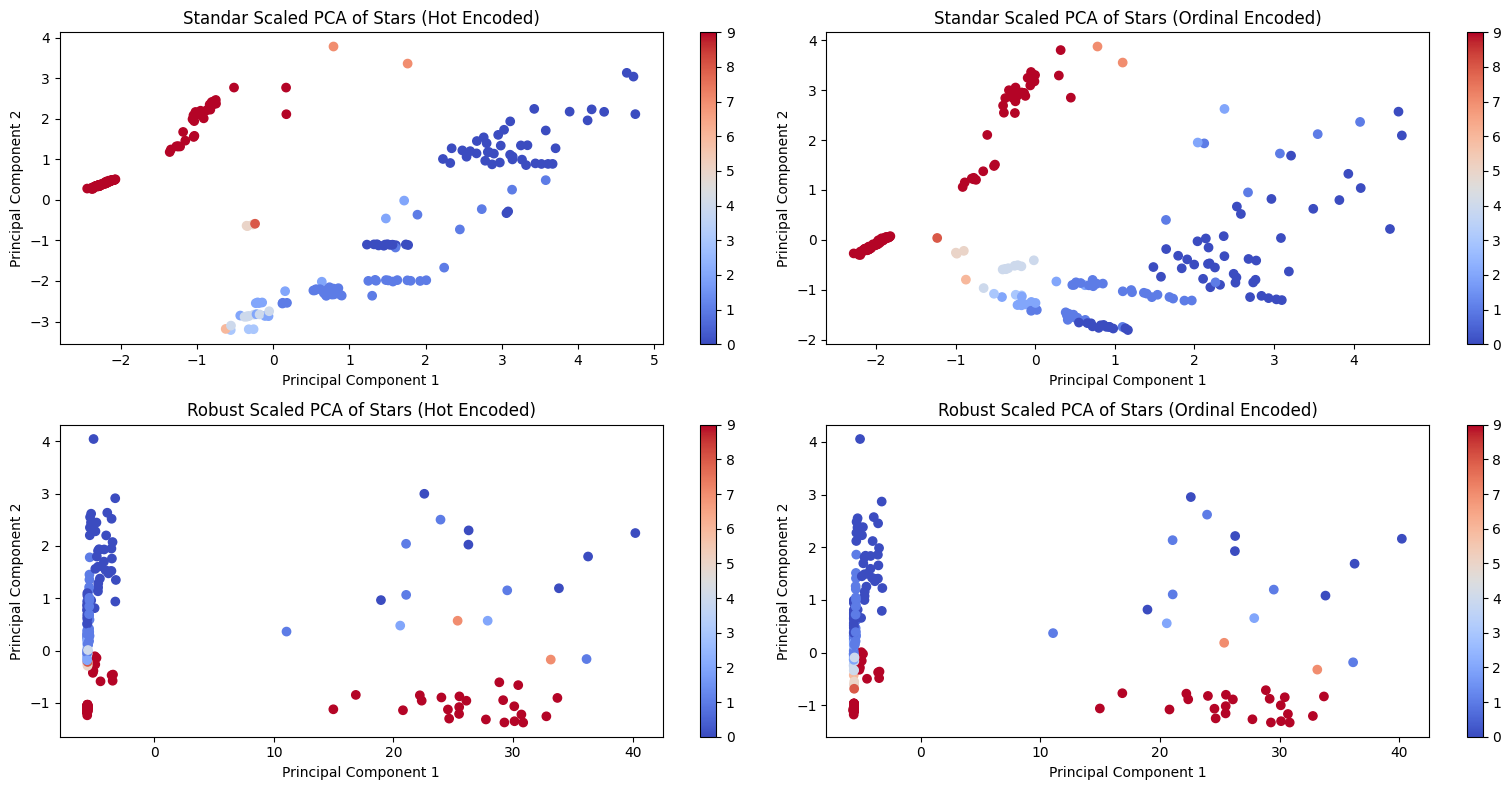

In [163]:
pca_model_std_hot = PCA(n_components=2)
pca_std_hot = pca_model_std_hot.fit_transform(data_hot_std_scaled)

pca_model_std_ordinal = PCA(n_components=2)
pca_std_ordinal= pca_model_std_ordinal.fit_transform(data_ordinary_std_scaled)

pca_model_rbt_hot = PCA(n_components=2)
pca_rbt_hot = pca_model_rbt_hot.fit_transform(data_hot_rbt_scaled)

pca_model_rbt_ordinal = PCA(n_components=2)
pca_rbt_ordinal= pca_model_rbt_ordinal.fit_transform(data_ordinary_rbt_scaled)

fig, axs = plt.subplots(2, 2, figsize=(16, 8))

scatter_std_hot = axs[0,0].scatter(pca_std_hot[:, 0], pca_std_hot[:, 1], c=data_ordinary["Color"], cmap='coolwarm')
fig.colorbar(scatter_std_hot,ax=axs[0,0])
axs[0,0].set_xlabel('Principal Component 1')
axs[0,0].set_ylabel('Principal Component 2')
axs[0,0].set_title('Standar Scaled PCA of Stars (Hot Encoded)')

scatter_std_ordinal = axs[0,1].scatter(pca_std_ordinal[:, 0], pca_std_ordinal[:, 1], c=data_ordinary["Color"], cmap='coolwarm')
fig.colorbar(scatter_std_ordinal, ax=axs[0,1])
axs[0,1].set_xlabel('Principal Component 1')
axs[0,1].set_ylabel('Principal Component 2')
axs[0,1].set_title('Standar Scaled PCA of Stars (Ordinal Encoded)')

scatter_rbt_hot = axs[1,0].scatter(pca_rbt_hot[:, 0], pca_rbt_hot[:, 1], c=data_ordinary["Color"], cmap='coolwarm')
fig.colorbar(scatter_rbt_hot,ax=axs[1,0])
axs[1,0].set_xlabel('Principal Component 1')
axs[1,0].set_ylabel('Principal Component 2')
axs[1,0].set_title('Robust Scaled PCA of Stars (Hot Encoded)')

scatter_rbt_ordinal = axs[1,1].scatter(pca_rbt_ordinal[:, 0], pca_rbt_ordinal[:, 1], c=data_ordinary["Color"], cmap='coolwarm')
fig.colorbar(scatter_rbt_ordinal, ax=axs[1,1])
axs[1,1].set_xlabel('Principal Component 1')
axs[1,1].set_ylabel('Principal Component 2')
axs[1,1].set_title('Robust Scaled PCA of Stars (Ordinal Encoded)')

plt.tight_layout()
plt.show()

Comparando los dos escalados podemos ver que Robust Scaler no nos proporciona una visualización insufieciente, dado que la mayoría de datos caen en el sector izquierdo, lo que repercutirá en la construcción de los clusters. Este hecho nos hace trabajar con Standar Scaler.

Para Standar Scaler podemos ver que las gráficas de los datos codificados con _One Hot Encoding_ y los datos codificados con _Ordinal Encoding_ son muy similares pero no son iguales. Esto resultará en diferencias a la hora de construir los clusters, que trataremos en posteriores secciones.

# My K-Means

Para implementar el algoritmo de _clustering_ **K-Means** se ha creado una clase con una interfaz parecida a la clase de **KMeans()** de _sklearn_.
En esta clase se han desarrollado 3 métodos públicos: _fit(X)_,_predict(X)_ y _fit\_predict(X)_.
Para implementar estos métodos públicos nos hemos servido de métodos privados que desglosan las distintas partes del algoritmo. Los métodos privados son los siguientes:
- **init_centroides(X)**: Este método elige al azar _n_ instancias, según el número de clusters, donde en un principio los centroides.
- **clasificacion_puntos(X)**: Este método clasifica cada punto en un centroide. Para ello se sirve de la función **elegir_centroide(punto)**
  - **elegir_centroide**: Dado una instancia del dataset indica a qué centroide se encuentra más cerca, calcula la distancia a todos los centroides y escoge la menor. Para ello se sirve de la función **distancia(punto1,punto2)**.
    - **distancia(punto1,punto2)**: Este método calcula la distancia euclídea para dos puntos dados.
- **recalcular()**: Este método para cada centroide calcula su nueva posición, moviendo el centroide al centro de masas de todos los puntos que pertenecen a ese centroide en concreto.
- **iteraciones(X)**: Utiliza los métodos anteriores para realizar las distintas iteraciones del algoritmo. El algoritmo termina la ejecución cuando por cada iteración ninguno de los clusters a cambiado de posición.
- **resultado_final(X)**:Rellena el atributo _labels_, que es una lista donde el índice se refiere a una instancia y cada valor es la clasificación de la instancia en un cluster. 

In [164]:
class MyKMeans:
    def __init__(self, n_clusters = 2, max_iter = 3000, tol = 1e-4, random_state = None) -> None:
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.cluster_centers_ = []
        self._class_puntos = []
        for i in range(self.n_clusters):
            self._class_puntos.append(np.array([]))
        self.labels = []

        
    def fit(self,X):
        self._init_centroides(X)
        self._iteraciones(X)

    def predict(self,X):
        self._clasificacion_puntos(X)
        self._resultado_final(X)
        return self.labels
    
    def fit_predict(self, X):
        self.fit(X)
        self.predict(X)
        return self.labels

    def _init_centroides(self, X):
        
        random.seed(self.random_state)
        n = 0
        while (n < self.n_clusters):
            indice = random.randint(0,len(X)-1)
            centroide = X[indice]
            condicion = not any(np.array_equal(centroide, c) for c in self.cluster_centers_)
            if condicion:
                self.cluster_centers_.append(centroide)
                n+=1

    def _distancia(self, punto1, punto2):
        return np.sqrt(np.sum((punto1 - punto2) ** 2))
    

    def _elegir_centroide(self,punto1):
        minimo = float('inf')
        for i in range(self.n_clusters):
            distancia = self._distancia(punto1, self.cluster_centers_[i])
            if minimo > distancia:
                minimo = distancia
                clase = i
        if len(self._class_puntos[clase]) == 0:
            self._class_puntos[clase] = np.append(self._class_puntos[clase],punto1)
        else:
            self._class_puntos[clase] = np.vstack((self._class_puntos[clase],punto1))


    def _clasificacion_puntos(self,X):
        for i in range(self.n_clusters):
            self._class_puntos[i] = np.array([])

        for row in X:
            self._elegir_centroide(row)


    def _iteraciones(self,X):
        old = self.cluster_centers_
        continua = True
        
        while continua:
            
            self._clasificacion_puntos(X)
            old = self.cluster_centers_
            self._recalcular()
            continua = False
            for i in range(self.n_clusters):
                if self._distancia(self.cluster_centers_[i],old[i]) > self.tol:
                    continua = True
                    break
        self._resultado_final(X)

    def _recalcular(self):
        old_clusters = self.cluster_centers_
        self.cluster_centers_ = []
        for k in range(self.n_clusters):
            if len(self._class_puntos[k]) > 0:
                self.cluster_centers_.append(np.mean(self._class_puntos[k],axis =0))
            else:
                self.cluster_centers_.append(old_clusters[k])

    def _resultado_final(self,X):
        self.labels = []
        for row in X:
            for i in range(self.n_clusters):
                if len(self._class_puntos[i] > 0) and row in self._class_puntos[i]:
                    self.labels.append(i)
                    break



# Comparaciones

Para las comparaciones entre modelos se realizará un estudio mediante el uso de la métrica silhouette, con la que se encontrará el núnero óptimo de clusters, u otros parámetros en caso del DBSCAN, que se útilizara para entrenar el mejor modelo para compararlo con los otros métodos. Además, se medirá el tiempo de entrenamiento requerido en cada modelo para realizar comprobaciones de rendimiento. Estas se realizarán exclusivamente en el modelo final para evitar sesgos por el número de parámetros probados, siendo este mayor en DBSCAN que en los modelos de KMeans. Las mediciones de tiempo seguirán la siguiente estructura:

In [165]:
import time
tiempo_entrenamiento = {}
start = time.time()
#model.fit(X, y)
stop = time.time()
print(f"Tiempo de entrenamiento: {stop - start}s")

Tiempo de entrenamiento: 2.002716064453125e-05s


Una vez obtenidos los mejores modelos mediante silhouette se realizarán comparaciones entre los dos modelos de KMeans con el objetivo de medir la eficacia del modelo desarrollado. Tras esto, se utilizará el modelo de sklearn.KMeans como referencia para compararlo con otros modelos de clustering, en este caso DBSCAN. 

## One hot encoding

### Búsqueda del mejor modelo

#### MyKMeans

In [166]:
range_n_clusters_hot = range(2, 25)
valores_medios_silhouette_hot_MyKMeans = []
silhouette_mejores_modelos = {}

for n_clusters in range_n_clusters_hot:
    my_modelo_kmeans = MyKMeans(
        n_clusters   = n_clusters,
        random_state = SEED
    )
    my_cluster_labels = my_modelo_kmeans.fit_predict(pca_std_hot)
    my_silhouette_avg = silhouette_score(pca_std_hot, my_cluster_labels)
    valores_medios_silhouette_hot_MyKMeans.append(my_silhouette_avg)

##### Mejor Modelo

In [167]:
best_index = np.argmax(valores_medios_silhouette_hot_MyKMeans)
best_n_clusters = range_n_clusters_hot[best_index]

MyKMeans_best_model_hot = MyKMeans(
    n_clusters   = best_n_clusters,
    random_state = SEED
)

start = time.time()
MyKMeans_best_model_hot.fit(pca_std_hot)
stop = time.time()
print(f"Tiempo de entrenamiento: {stop - start}s")
tiempo_entrenamiento['MyKmeans: One-Hot'] = (stop - start)
myhot_predict = MyKMeans_best_model_hot.predict(pca_std_hot)

silhouette_mejores_modelos["MyKmeans: One-Hot"] = valores_medios_silhouette_hot_MyKMeans[np.argmax(valores_medios_silhouette_hot_MyKMeans)] 

Tiempo de entrenamiento: 0.07996869087219238s


#### KMeans

In [168]:
valores_medios_silhouette_hot_KMeans = []

for n_clusters in range_n_clusters_hot:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        random_state = SEED
    )
    cluster_labels = modelo_kmeans.fit_predict(pca_std_hot)
    silhouette_avg = silhouette_score(pca_std_hot, cluster_labels)
    valores_medios_silhouette_hot_KMeans.append(silhouette_avg)

##### Mejor Modelo

In [169]:
best_index = np.argmax(valores_medios_silhouette_hot_KMeans)

best_n_clusters = range_n_clusters_hot[best_index]

KMeans_best_model_hot = KMeans(
    n_clusters   = best_n_clusters,
    random_state = SEED
)
start = time.time()
KMeans_best_model_hot.fit(pca_std_hot)
stop = time.time()
print(f"Tiempo de entrenamiento: {stop - start}s")
tiempo_entrenamiento['sklearn.Kmeans: One-Hot'] = (stop - start)
KMean_hot_predict = KMeans_best_model_hot.predict(pca_std_hot)

silhouette_mejores_modelos["sklearn.Kmeans: One-Hot"] = valores_medios_silhouette_hot_KMeans[np.argmax(valores_medios_silhouette_hot_KMeans)] 

Tiempo de entrenamiento: 0.005018472671508789s


#### DBSCAN

En caso de DBSCAN no es posible separar fit y predict, pero tras realizar pruebas de entrenamiento cronómetrado se comprueba que las funciones fit y fit_predict utilizando el dataset pca_hot tienen tiempos de ejecución equivalentes, concluyendo que la mayoría de este tiempo se dedica al fit y solo una pequeña parte al predict. 

Tiempo de entrenamiento: 0.0015821456909179688s


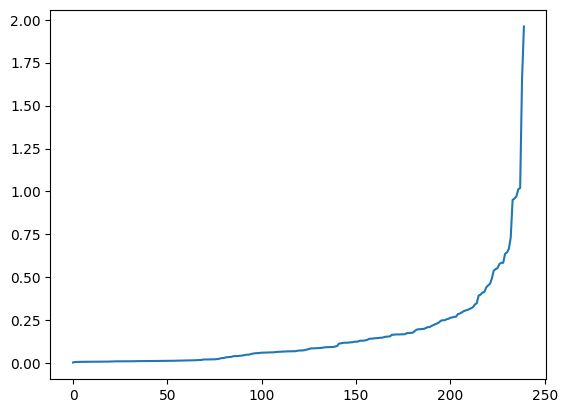

In [170]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Define min_samples
min_samples = 4

# Calcula las distancias k-ésimas más cercanas a cada punto
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
nearest_neighbors.fit(pca_std_hot)
distances, _ = nearest_neighbors.kneighbors(pca_std_hot)

# Ordena las distancias
distances = np.sort(distances, axis=0)[:, -1]

# Grafica las distancias
plt.plot(distances)

# Ajusta DBSCAN con el valor de eps sugerido
eps = 0.6
DBscan_hot_best_model = DBSCAN(eps=eps, min_samples=min_samples)
start = time.time()
DBscan_hot_predict = DBscan_hot_best_model.fit_predict(pca_std_hot)
stop = time.time()
print(f"Tiempo de entrenamiento: {stop - start}s")
tiempo_entrenamiento['DBSCAN: One-Hot'] = (stop - start)
silhouette_mejores_modelos["DBSCAN: One-Hot"]  = silhouette_score(pca_std_hot, DBscan_hot_predict)

#### Graficar Comparación

##### MyKMeans Vs KMeans

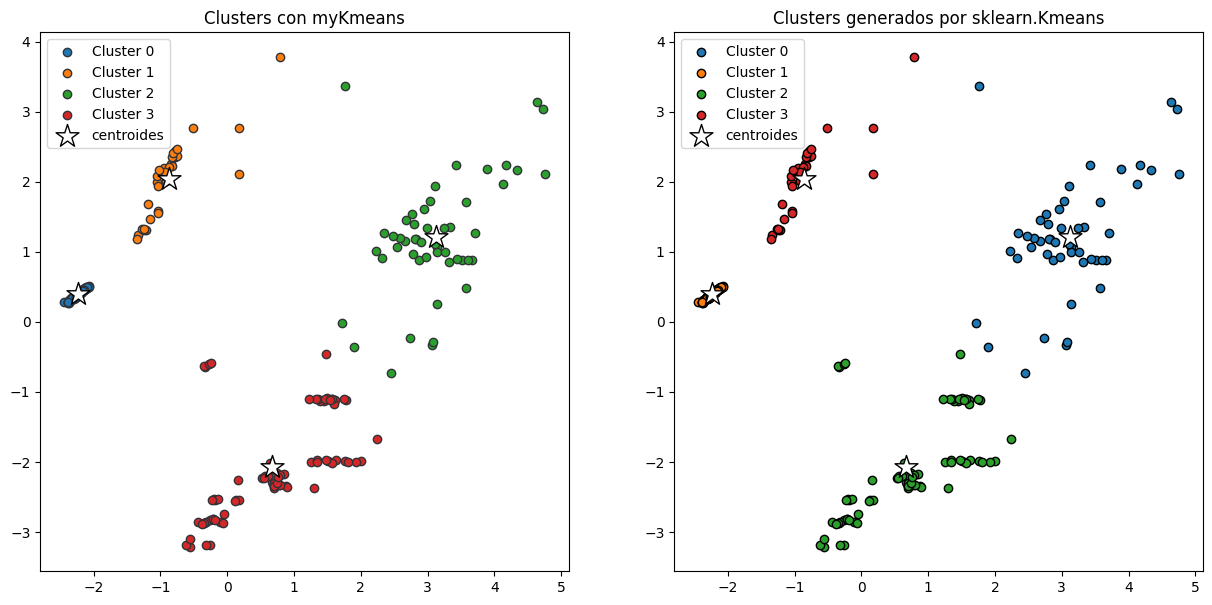

In [171]:

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

for i in np.unique(myhot_predict):
    ax[0].scatter(
        x = pca_std_hot[myhot_predict == i, 0],
        y = pca_std_hot[myhot_predict == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = '#313338',
        label= f"Cluster {i}"
    )


for i in np.unique(KMean_hot_predict):
    ax[1].scatter(
        x = pca_std_hot[KMean_hot_predict == i, 0],
        y = pca_std_hot[KMean_hot_predict == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

x = [centroide[0] for centroide in MyKMeans_best_model_hot.cluster_centers_]
y = [centroide[1] for centroide in MyKMeans_best_model_hot.cluster_centers_]
ax[0].scatter(
    x = x,
    y = y,
    c = 'white',
    s = 300,
    marker = '*',
    edgecolor = 'black',
    label  = 'centroides'
)

ax[1].scatter(
    x = KMeans_best_model_hot.cluster_centers_[:, 0],
    y = KMeans_best_model_hot.cluster_centers_[:, 1],
    c = 'white',
    s = 300,
    marker = '*',
    edgecolor = 'black',
    label  = 'centroides'
)

ax[0].set_title('Clusters con myKmeans')
ax[0].legend()
ax[1].set_title('Clusters generados por sklearn.Kmeans')
ax[1].legend()

##### KMeans Vs DBSCAN

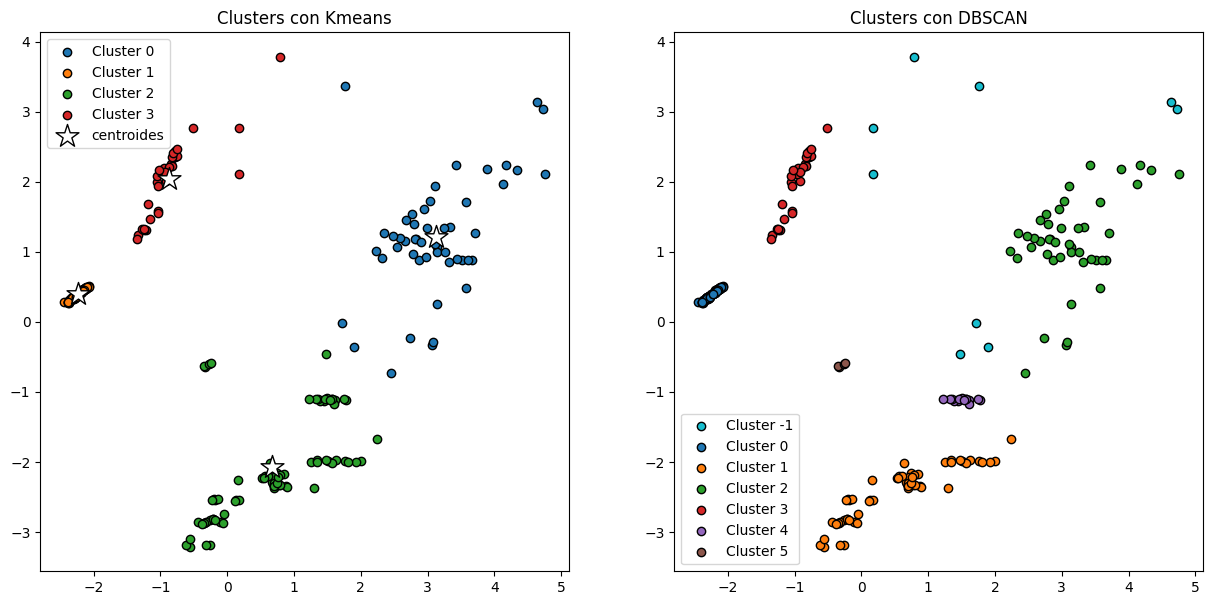

In [172]:

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

for i in np.unique(KMean_hot_predict):
    ax[0].scatter(
        x = pca_std_hot[KMean_hot_predict == i, 0],
        y = pca_std_hot[KMean_hot_predict == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )


for i in np.unique(DBscan_hot_predict):
    ax[1].scatter(
        x = pca_std_hot[DBscan_hot_predict == i, 0],
        y = pca_std_hot[DBscan_hot_predict == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

ax[0].scatter(
    x = KMeans_best_model_hot.cluster_centers_[:, 0],
    y = KMeans_best_model_hot.cluster_centers_[:, 1],
    c = 'white',
    s = 300,
    marker = '*',
    edgecolor = 'black',
    label  = 'centroides'
)


ax[0].set_title('Clusters con Kmeans')
ax[0].legend()
ax[1].set_title('Clusters con DBSCAN')
ax[1].legend()

##### Evolución indices silhouette 

Text(0, 0.5, 'Media índices silhouette')

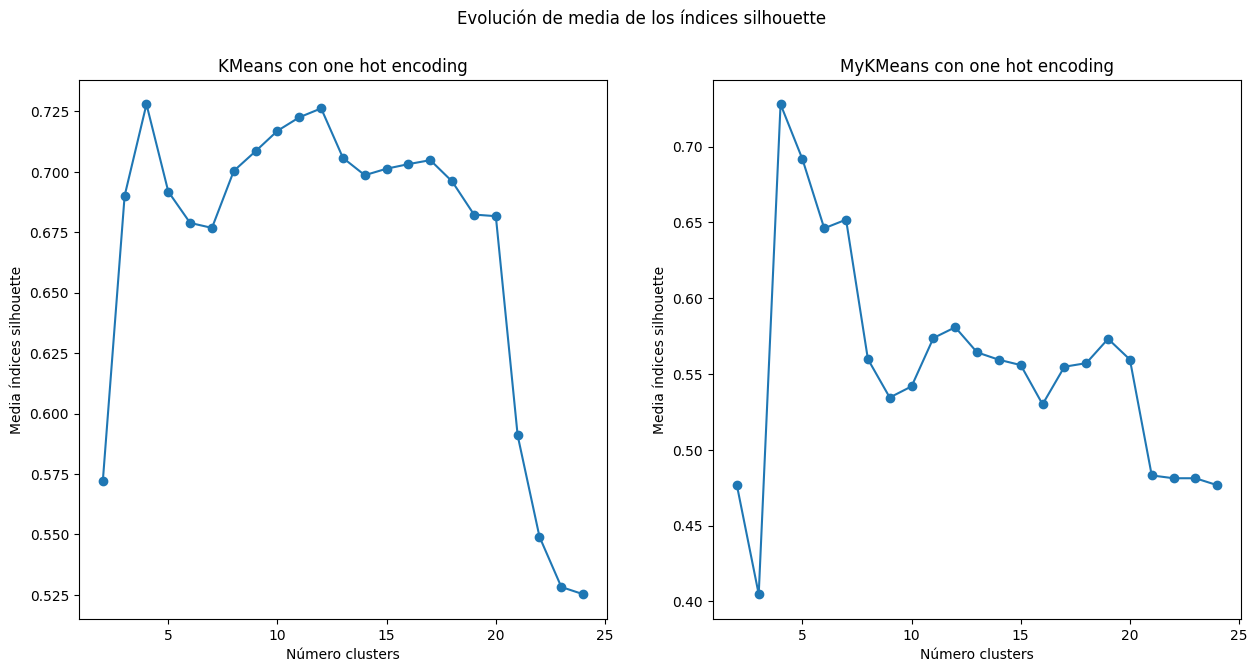

In [173]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle("Evolución de media de los índices silhouette")

ax[0].plot(range_n_clusters_hot, valores_medios_silhouette_hot_KMeans, marker='o')
ax[0].set_title("KMeans con one hot encoding")
ax[0].set_xlabel('Número clusters')
ax[0].set_ylabel('Media índices silhouette')

ax[1].plot(range_n_clusters_hot, valores_medios_silhouette_hot_MyKMeans, marker='o')
ax[1].set_title("MyKMeans con one hot encoding")
ax[1].set_xlabel('Número clusters')
ax[1].set_ylabel('Media índices silhouette')

Tras mostrar la evolución de indices de silhouette se comprueba que los resultados son distintos excepto en el caso del número de clusters óptimo. Esto se confirma comprobando el mayor valor obtenido durante la elección de mejor modelo en ambos casos:

In [174]:
print("Núnero de clusters óptimo para sklearn.Kmeans: ",range_n_clusters_hot[np.argmax(valores_medios_silhouette_hot_KMeans)])
print("Valor de silhouette para número óptimo de clusters de sklearn.Kmeans",valores_medios_silhouette_hot_KMeans[np.argmax(valores_medios_silhouette_hot_KMeans)] )
print("Núnero de clusters óptimo para myKmeans: ",range_n_clusters_hot[np.argmax(valores_medios_silhouette_hot_MyKMeans)])
print("Valor de silhouette para número óptimo de clusters de myKmeans",valores_medios_silhouette_hot_MyKMeans[np.argmax(valores_medios_silhouette_hot_MyKMeans)] )

Núnero de clusters óptimo para sklearn.Kmeans:  4
Valor de silhouette para número óptimo de clusters de sklearn.Kmeans 0.7279483687392695
Núnero de clusters óptimo para myKmeans:  4
Valor de silhouette para número óptimo de clusters de myKmeans 0.7279483687392695


En el caso de utilizar 4 clusters, el valor de silhouette es idéntico, lo cual muestra que ambos métodos consiguen el mismo resultado. Esto además se puede confirmar mediante los gráficos que muestran la distribución de clusters finales, en las que se puede observar que ambos modelos han resultado en el mismo resultado, aunque con tiempos de ejecución distintos.

In [191]:
print("Núnero de clusters óptimo para sklearn.Kmeans: ",range_n_clusters_hot[np.argmax(valores_medios_silhouette_hot_KMeans)])
print("Valor de silhouette para número óptimo de clusters de sklearn.Kmeans",valores_medios_silhouette_hot_KMeans[np.argmax(valores_medios_silhouette_hot_KMeans)] )
print("Eps óptimo para DBSCAN: ",eps_silhouette_hot_DBSCAN[np.argmax(valores_medios_silhouette_hot_DBSCAN)])
print("Min_samples óptimo para DBSCAN: ",min_samples_silhouette_hot_DBSCAN[np.argmax(valores_medios_silhouette_hot_DBSCAN)])
print("Valor de silhouette para eps óptimos de DBSCAN",silhouette_mejores_modelos['DBSCAN: One-Hot'] )

Núnero de clusters óptimo para sklearn.Kmeans:  4
Valor de silhouette para número óptimo de clusters de sklearn.Kmeans 0.7279483687392695
Eps óptimo para DBSCAN:  1.0
Min_samples óptimo para DBSCAN:  20
Valor de silhouette para eps óptimos de DBSCAN 0.6356337521081534


## Ordinal encoding

### Búsqueda del mejor modelo

#### MyKMeans

In [177]:
range_n_clusters_ordinal = range(2, 21)
valores_medios_silhouette_ordinal_MyKMeans = []

for n_clusters in range_n_clusters_ordinal:
    modelo_kmeans = MyKMeans(
        n_clusters   = n_clusters,
        random_state = SEED
    )
    cluster_labels = modelo_kmeans.fit_predict(pca_std_ordinal)
    MyKMeans_silhouette_avg = silhouette_score(pca_std_ordinal, cluster_labels)
    valores_medios_silhouette_ordinal_MyKMeans.append(MyKMeans_silhouette_avg)

##### Mejor Modelo

In [178]:
best_index = np.argmax(valores_medios_silhouette_ordinal_MyKMeans)
best_n_clusters = range_n_clusters_ordinal[best_index]

MyKMeans_best_model_ordinal = MyKMeans(
    n_clusters   = best_n_clusters,
    random_state = SEED
)
start = time.time()
MyKMeans_best_model_ordinal.fit(pca_std_ordinal)
stop = time.time()
print(f"Tiempo de entrenamiento: {stop - start}s")
tiempo_entrenamiento['MyKmeans: Ordinal'] = (stop - start)
myordinal_predict = MyKMeans_best_model_ordinal.predict(pca_std_ordinal)

silhouette_mejores_modelos["MyKmeans: ordinal"] = valores_medios_silhouette_ordinal_MyKMeans[np.argmax(valores_medios_silhouette_ordinal_MyKMeans)] 

Tiempo de entrenamiento: 0.07891845703125s


#### KMeans

In [179]:
valores_medios_silhouette_ordinal_KMeans = []

for n_clusters in range_n_clusters_ordinal:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        random_state = SEED
    )
    cluster_labels = modelo_kmeans.fit_predict(pca_std_ordinal)
    KMeans_silhouette_avg = silhouette_score(pca_std_ordinal, cluster_labels)
    valores_medios_silhouette_ordinal_KMeans.append(KMeans_silhouette_avg)

##### Mejor Modelo

In [180]:
best_index = np.argmax(valores_medios_silhouette_ordinal_KMeans)

best_n_clusters = range_n_clusters_ordinal[best_index]

KMeans_best_model_ordinal = KMeans(
    n_clusters   = best_n_clusters,
    random_state = SEED
)

start = time.time()
KMeans_best_model_ordinal.fit(pca_std_ordinal)
stop = time.time()
print(f"Tiempo de entrenamiento: {stop - start}s")
tiempo_entrenamiento['sklearn.Kmeans: Ordinal'] = (stop - start)

KMean_ordinary_predict = KMeans_best_model_ordinal.predict(pca_std_ordinal)

silhouette_mejores_modelos["sklearn.Kmeans: ordinal"] = valores_medios_silhouette_ordinal_KMeans[np.argmax(valores_medios_silhouette_ordinal_KMeans)] 

Tiempo de entrenamiento: 0.00872349739074707s


#### DBSCAN

Tiempo de entrenamiento: 0.002920866012573242s


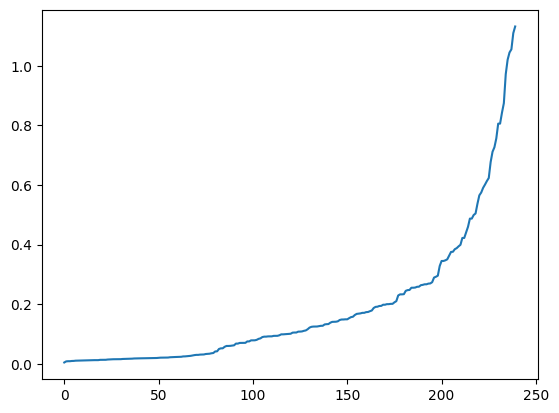

In [181]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Define min_samples
min_samples = 4

# Calcula las distancias k-ésimas más cercanas a cada punto
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
nearest_neighbors.fit(pca_std_ordinal)
distances, _ = nearest_neighbors.kneighbors(pca_std_ordinal)

# Ordena las distancias
distances = np.sort(distances, axis=0)[:, -1]

# Grafica las distancias
plt.plot(distances)

# Ajusta DBSCAN con el valor de eps sugerido
eps = 0.4
DBscan_ordinary_best_model = DBSCAN(eps=eps, min_samples=min_samples)
start = time.time()
DBscan_ordinary_predict = DBscan_ordinary_best_model.fit_predict(pca_std_ordinal)
stop = time.time()
print(f"Tiempo de entrenamiento: {stop - start}s")
tiempo_entrenamiento['DBSCAN: Ordinal'] = (stop - start)
silhouette_mejores_modelos["DBSCAN: Ordinal"]  = silhouette_score(pca_std_ordinal, DBscan_ordinary_predict) 

#### Graficar Comparación

##### MyKmeans vs KMeans

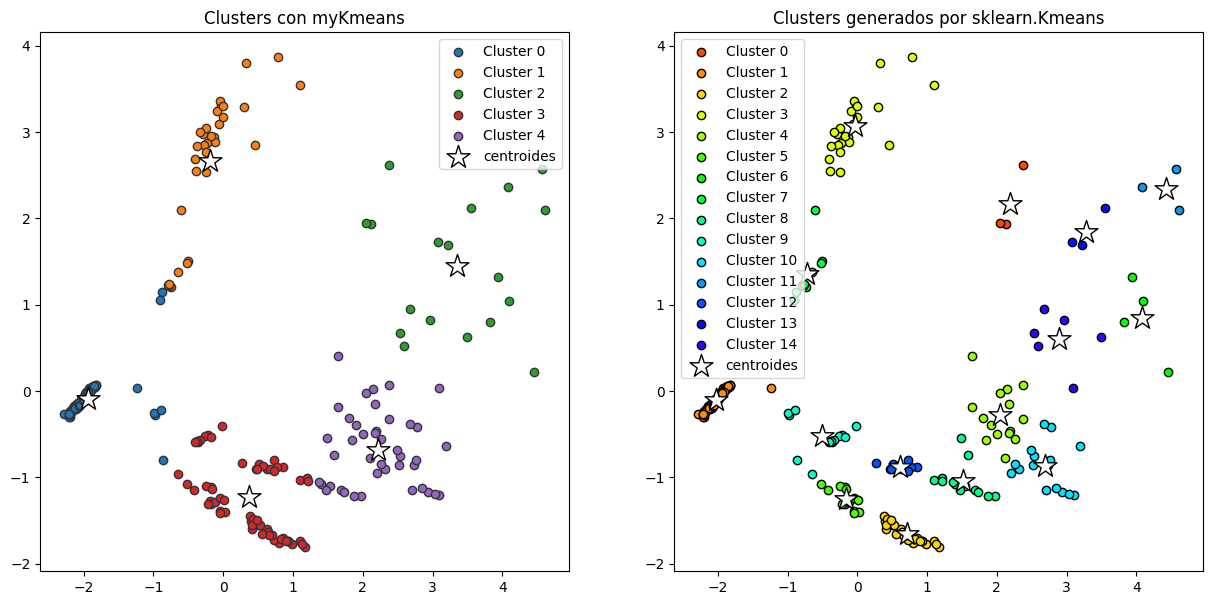

In [182]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
colors = sns.color_palette("hsv", 20)

for i in np.unique(myordinal_predict):
    ax[0].scatter(
        x = pca_std_ordinal[myordinal_predict == i, 0],
        y = pca_std_ordinal[myordinal_predict == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = '#313338',
        label= f"Cluster {i}"
    )


for i in np.unique(KMean_ordinary_predict):
    ax[1].scatter(
        x = pca_std_ordinal[KMean_ordinary_predict == i, 0],
        y = pca_std_ordinal[KMean_ordinary_predict == i, 1],
        color = colors[i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

x = [centroide[0] for centroide in MyKMeans_best_model_ordinal.cluster_centers_]
y = [centroide[1] for centroide in MyKMeans_best_model_ordinal.cluster_centers_]
ax[0].scatter(
    x = x,
    y = y,
    c = 'white',
    s = 300,
    marker = '*',
    edgecolor = 'black',
    label  = 'centroides'
)

ax[1].scatter(
    x = KMeans_best_model_ordinal.cluster_centers_[:, 0],
    y = KMeans_best_model_ordinal.cluster_centers_[:, 1],
    c = 'white',
    s = 300,
    marker = '*',
    edgecolor = 'black',
    label  = 'centroides'
)

ax[0].set_title('Clusters con myKmeans')
ax[0].legend()
ax[1].set_title('Clusters generados por sklearn.Kmeans')
ax[1].legend()

Si se observan los dos gráficos detenidamente se puede comprobar que en este caso existe la diferencia de 1 punto entre los dos modelos, al estar el centroide del grupo 3 del modelo de sklearn en una posición ligeramente superior. Así, en el borde inferior de este, entre los puntos rojos, se puede distinguir un punto naranja que pertenece al cluster 1, ocurrencia no existente en el modelo de myKmeans. 

##### KMeans vs DBSCAN

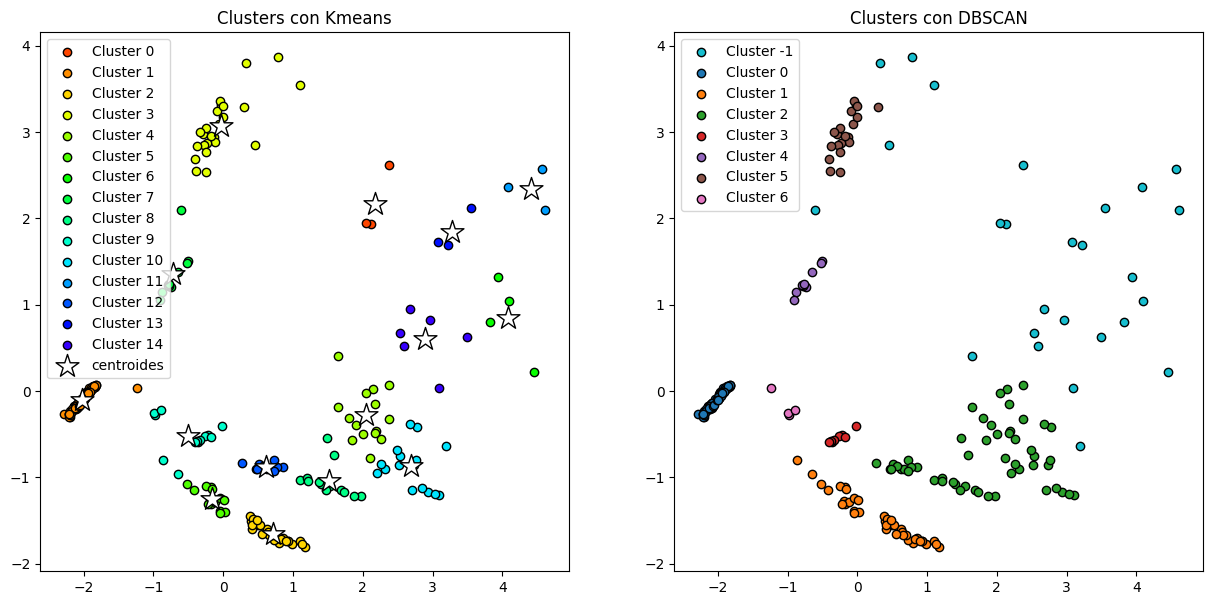

In [183]:

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
colors = sns.color_palette("hsv", 20)

for i in np.unique(KMean_ordinary_predict):
    ax[0].scatter(
        x = pca_std_ordinal[KMean_ordinary_predict == i, 0],
        y = pca_std_ordinal[KMean_ordinary_predict == i, 1],
        color = colors[i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )


for i in np.unique(DBscan_ordinary_predict):
    ax[1].scatter(
        x = pca_std_ordinal[DBscan_ordinary_predict == i, 0],
        y = pca_std_ordinal[DBscan_ordinary_predict == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

ax[0].scatter(
    x = KMeans_best_model_ordinal.cluster_centers_[:, 0],
    y = KMeans_best_model_ordinal.cluster_centers_[:, 1],
    c = 'white',
    s = 300,
    marker = '*',
    edgecolor = 'black',
    label  = 'centroides'
)


ax[0].set_title('Clusters con Kmeans')
ax[0].legend()
ax[1].set_title('Clusters con DBSCAN')
ax[1].legend()

##### Evolución de los indices de silhouette

Text(0, 0.5, 'Media índices silhouette')

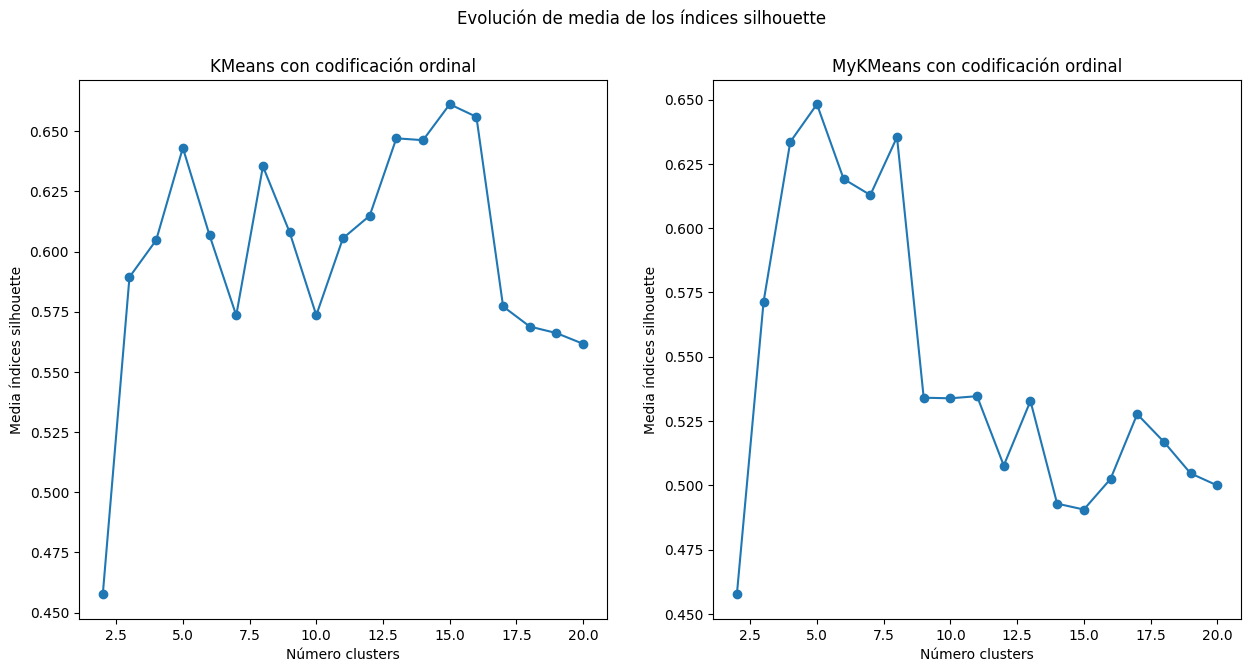

In [184]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle("Evolución de media de los índices silhouette")
ax[0].plot(range_n_clusters_ordinal, valores_medios_silhouette_ordinal_KMeans, marker='o')
ax[0].set_title("KMeans con codificación ordinal")
ax[0].set_xlabel('Número clusters')
ax[0].set_ylabel('Media índices silhouette')

ax[1].plot(range_n_clusters_ordinal, valores_medios_silhouette_ordinal_MyKMeans, marker='o')
ax[1].set_title("MyKMeans con codificación ordinal")
ax[1].set_xlabel('Número clusters')
ax[1].set_ylabel('Media índices silhouette')

En caso de utilizar una codificación ordinal se mantiene la igualdad en el número de clusters óptimo pero existe una pequeña diferencia en la posición de estos. Así, el valor de sillhouette es ligeramente distinto para los modelos Kmeans de sklearn y propio:

In [185]:
print("Núnero de clusters óptimo para sklearn.Kmeans: ",range_n_clusters_ordinal[np.argmax(valores_medios_silhouette_ordinal_KMeans)])
print("Valor de silhouette para número óptimo de clusters de sklearn.Kmeans",valores_medios_silhouette_ordinal_KMeans[np.argmax(valores_medios_silhouette_ordinal_KMeans)] )
print("Núnero de clusters óptimo para myKmeans: ",range_n_clusters_ordinal[np.argmax(valores_medios_silhouette_ordinal_MyKMeans)])
print("Valor de silhouette para número óptimo de clusters de myKmeans",valores_medios_silhouette_ordinal_MyKMeans[np.argmax(valores_medios_silhouette_ordinal_MyKMeans)] )

Núnero de clusters óptimo para sklearn.Kmeans:  15
Valor de silhouette para número óptimo de clusters de sklearn.Kmeans 0.6611870414139304
Núnero de clusters óptimo para myKmeans:  5
Valor de silhouette para número óptimo de clusters de myKmeans 0.6481940668491667


In [192]:
print("Núnero de clusters óptimo para sklearn.Kmeans: ",range_n_clusters_ordinal[np.argmax(valores_medios_silhouette_ordinal_KMeans)])
print("Valor de silhouette para número óptimo de clusters de sklearn.Kmeans",valores_medios_silhouette_ordinal_KMeans[np.argmax(valores_medios_silhouette_ordinal_KMeans)] )
print("Valor de silhouette para eps óptimos de DBSCAN",silhouette_mejores_modelos['DBSCAN: Ordinal'])

Núnero de clusters óptimo para sklearn.Kmeans:  15
Valor de silhouette para número óptimo de clusters de sklearn.Kmeans 0.6611870414139304
Valor de silhouette para eps óptimos de DBSCAN 0.5299651882540758


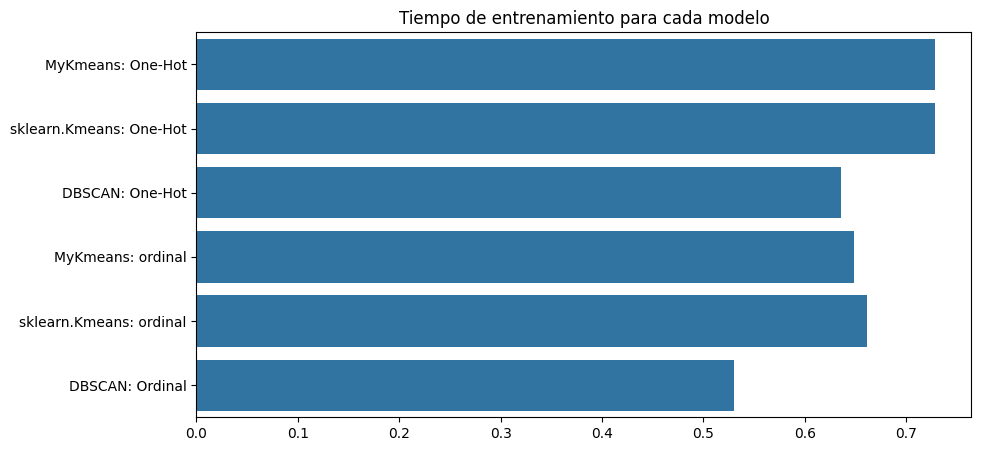

In [193]:
plt.figure(figsize= (10,5))
sns.barplot(data = silhouette_mejores_modelos, orient='y')
plt.title("Tiempo de entrenamiento para cada modelo")
plt.show()

### Tiempos de entrenamiento  de todos los modelos

Una vez se finalizan todos los modelos es posible comprobar el tiempo que tardan en ser entrenado cada modelo con ambos tipos de codificación de variables categóricas. 

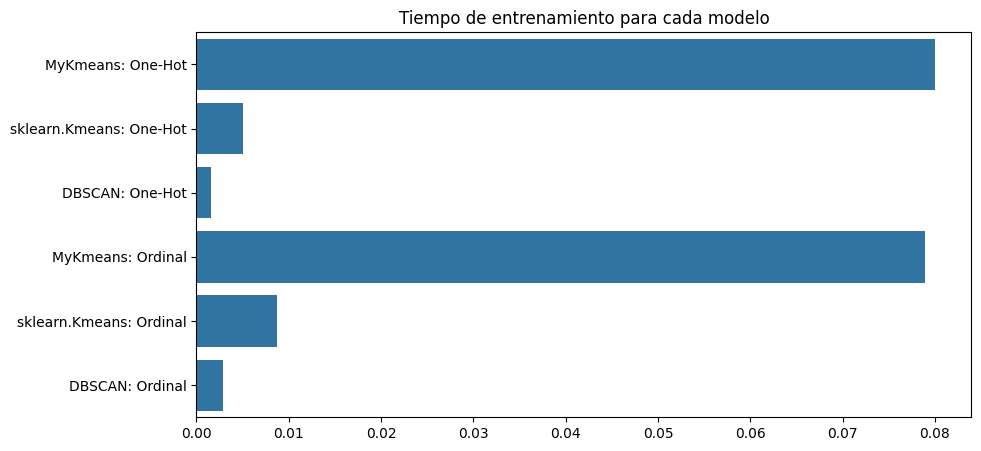

In [189]:
plt.figure(figsize= (10,5))
sns.barplot(data = tiempo_entrenamiento, orient='y')
plt.title("Tiempo de entrenamiento para cada modelo")
plt.show()

Independientemente de la codificación el modelo propio tarda hasta 10 veces más en entrenar con los datos que los modelos de la librería sklearn, mostrando una falta de optimización interna. El mejor resultado lo obtiene en todos los casos DBSCAN, pero este ha sido descartado en la medición de silhouette. Teniendo en cuenta estos datos de tiempo y los valores de silhouette la mejor pipeline resulta ser sklearn.Kmeans con la codificación de One-Hot encoding y el escalador Standard Scaler.

## Comparación con datos reales

In [204]:
datos_iniciales_clasificados = []
for i in range(len(KMeans_best_model_hot.cluster_centers_)):
    datos_iniciales_clasificados.append(np.array([]))

for i in range(len(KMean_hot_predict)):
    if len(datos_iniciales_clasificados[KMean_hot_predict[i]]) == 0:
        datos_iniciales_clasificados[KMean_hot_predict[i]] =  np.append(datos_iniciales_clasificados[KMean_hot_predict[i]],data.iloc[i])
    else:
        datos_iniciales_clasificados[KMean_hot_predict[i]] =  np.vstack((datos_iniciales_clasificados[KMean_hot_predict[i]],data.iloc[i]))
print(datos_iniciales_clasificados)

[array([[39000, 204000.0, 10.6, -4.7, 'Blue', 'O'],
       [33750, 220000.0, 26.0, -6.1, 'Blue', 'B'],
       [36108, 198000.0, 10.2, -4.4, 'Blue', 'O'],
       [33300, 240000.0, 12.0, -6.5, 'Blue', 'B'],
       [40000, 813000.0, 14.0, -6.23, 'Blue', 'O'],
       [23000, 127000.0, 36.0, -5.76, 'Blue', 'O'],
       [17120, 235000.0, 83.0, -6.89, 'Blue', 'O'],
       [11096, 112000.0, 12.0, -5.91, 'Blue', 'O'],
       [14245, 231000.0, 42.0, -6.12, 'Blue', 'O'],
       [24630, 363000.0, 63.0, -5.83, 'Blue', 'O'],
       [12893, 184000.0, 36.0, -6.34, 'Blue', 'O'],
       [24345, 142000.0, 57.0, -6.24, 'Blue', 'O'],
       [33421, 352000.0, 67.0, -5.79, 'Blue', 'O'],
       [37800, 202900.0, 6.86, -4.56, 'Blue', 'O'],
       [25390, 223000.0, 57.0, -5.92, 'Blue', 'O'],
       [11567, 251000.0, 36.0, -6.245, 'Blue', 'O'],
       [12675, 452000.0, 83.0, -5.62, 'Blue', 'O'],
       [5752, 245000.0, 97.0, -6.63, 'Blue', 'O'],
       [8927, 239000.0, 35.0, -7.34, 'Blue', 'O'],
       [7282, 13

In [219]:
from statistics import mode

datos_medios_clusters = []
for i in range(len(KMeans_best_model_hot.cluster_centers_)):
    datos_medios_clusters.append([])

for i in range(len(KMeans_best_model_hot.cluster_centers_)):
    for j in range(4):
        datos_medios_clusters[i].append([])
        datos_medios_clusters[i][j] = np.mean(datos_iniciales_clasificados[i][:,j])
    
    datos_medios_clusters[i].append([])
    datos_medios_clusters[i][4] = mode(datos_iniciales_clasificados[i][:,4])
    datos_medios_clusters[i].append([])
    datos_medios_clusters[i][5] = mode(datos_iniciales_clasificados[i][:,5])
    

print(datos_medios_clusters)


[[22144, 351309.42, 431.12574, -6.954339999999999, 'Blue', 'O'], [3140, 0.0030495124999999996, 0.22908, 15.051737499999998, 'Red', 'M'], [13503, 10788.77335512987, 25.431871818181815, 6.3912077922077914, 'Blue-White', 'B'], [3671, 222090.9090909091, 1011.6666666666666, -8.993030303030302, 'Red', 'M']]
